<a href="https://colab.research.google.com/github/Ananya-ags/Mask-Detection-using-YOLOv3/blob/main/yolov3_mask_detection_Ananya_IITR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Checking if NVIDIA GPU is enabled
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
# Clone
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# Configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# Compile
!make

In [5]:
# Make a copy of yolov3.cfg
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [6]:
# Change lines in yolov3.cfg file
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 6000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=3@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=3@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=3@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=24@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=24@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=24@' cfg/yolov3_training.cfg

In [7]:
!echo -e 'mask_weared_incorrect\nwith_mask\nwithout_mask' > data/obj.names
#!echo -e 'classes= 3\ntrain  = data/train.txt\nvalid  = data/valid.txt\ntest  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
!echo -e 'classes= 3\ntrain  = data/train.txt\ntest  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data

In [8]:
!cp cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_testing.cfg
!cp data/obj.names /mydrive/yolov3/classes.txt

In [ ]:
!mkdir data/obj
!unzip /mydrive/yolov3/images.zip -d data/obj

In [10]:
import glob
images_list = glob.glob("data/obj/train/*.jpg")
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
# Uncomment below and comment above to re-start your training from last saved weights
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights -dont_show

In [ ]:
#Finding mAP on the test data. 
#first importing the test imgs in data folder. 
!mkdir data/test_imgs
!unzip /mydrive/yolov3/test.zip -d data/test_imgs

In [15]:
#Writing the pathnames of all the test images in a test txt file. 
import glob
images_list = glob.glob("data/test_imgs/test/*.jpg")
with open("data/test.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
#Finding out the mAP on the test images. 
!./darknet detector map data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/yolov3_training_last.weights -dont_show -ext_output < data/test.txt > result_test.txt

In [17]:
#the results are stored in the result_test file. 
!cat /content/darknet/result_test.txt

net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 307 K-images (4 Kilo-batches_64) 

 calculation mAP (mean average precision)...
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 

 detections_count = 3791, unique_truth_count = 2777  
class_id = 0, name = mask_weared_incorrect, ap = 99.94%   	 (TP = 70, FP = 2) 
class_id = 1, name = with_mask, ap = 98.58%   	 (TP = 2201, FP = 70) 
class_id = 2, name = without_mask, ap = 98.83%   	 (TP = 462, FP = 15) 

 for conf_thresh = 0.25, precision = 0.97, recall = 0.98, F1-score = 0.98 
 for conf_thresh = 0.25, TP = 2733, FP = 87, FN = 44, average IoU = 80.75 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.991194, or 99.12 % 

Set -points flag:
 `-points 101` for MS COCO 
 `-points 11` for PascalVOC 2007 (uncomment `difficult` in voc.

**Thus we can see that the model is achieveing a mAP of 99.12%**

**Now Displaying some predictions by the model**

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from google.colab.patches import cv2_imshow

In [ ]:
!mkdir data/sample
!unzip /mydrive/yolov3/sample_imgs.zip -d data/sample

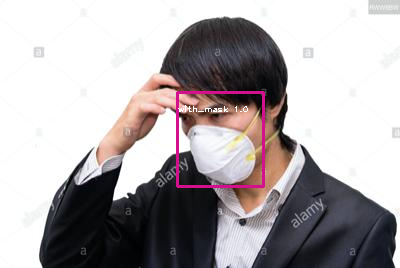

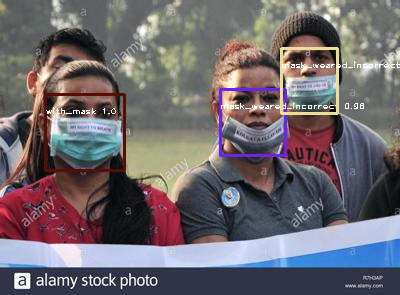

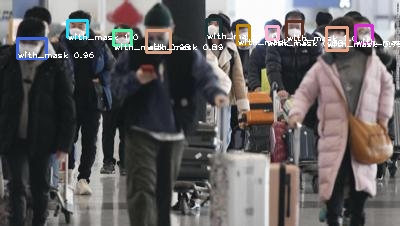

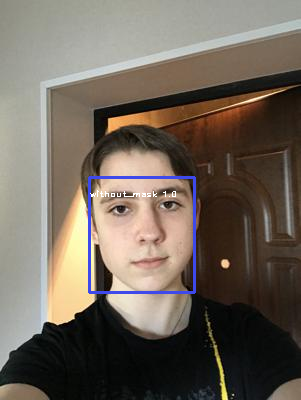

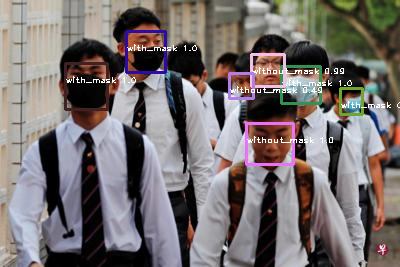

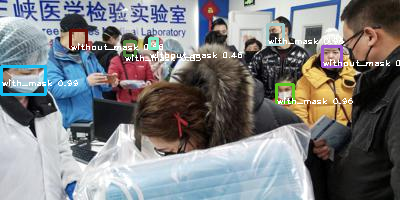

In [39]:
net = cv2.dnn.readNet('/content/gdrive/MyDrive/yolov3/yolov3_training_last.weights', '/content/gdrive/MyDrive/yolov3/yolov3_testing.cfg')

classes = []
with open("/content/gdrive/MyDrive/yolov3/classes.txt", "r") as f:
    classes = f.read().splitlines()

#looping through the 6 images on which we want to make predictions
for i in range(1,7):
  img=cv2.imread('/content/darknet/data/sample/sample_imgs/img' + str(i) +'.jpg')
  height, width, _ = img.shape  
  blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)

  net.setInput(blob)
  output_layers_names = net.getUnconnectedOutLayersNames()
  layerOutputs = net.forward(output_layers_names)

  boxes = []
  confidences = []
  class_ids = []

  for output in layerOutputs:
          for detection in output:
              scores = detection[5:]  #these are the confidence scores for the various classes. 
              class_id = np.argmax(scores)
              confidence = scores[class_id]
              if confidence > 0.4:
                  center_x = int(detection[0]*width)
                  center_y = int(detection[1]*height)
                  w = int(detection[2]*width)
                  h = int(detection[3]*height)

                  x = int(center_x - w/2)
                  y = int(center_y - h/2)

                  boxes.append([x, y, w, h])
                  confidences.append((float(confidence)))
                  class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.4, 0.4)
  font= cv2.FONT_HERSHEY_PLAIN
  colors=np.random.uniform(0,255, size=(len(boxes), 3))

  for i in indexes.flatten():
      x, y, w, h = boxes[i]
      label = str(classes[class_ids[i]])
      confidence = str(round(confidences[i],2))
      color = colors[i]
      cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
      cv2.putText(img, label + " " + confidence, (x, y+20), font, 0.6, (255,255,255), 1)
      
  cv2_imshow(img)
  #cv2.waitKey(0)
  #cv2.destroyAllWindows()


**Thus we can see that the model is able to classify into three classess- with_mask, without_mask, mask_weared_incorrectly**